In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()
print('train set shape',train.shape)
print('test set shape',test.shape)
print('Age missing',train.iloc[:891].Age.isnull().sum(),'   ',
      (train.iloc[:891].Age.isnull().sum())/int(891)*int(100),'%')
print('Cabin missing',train.iloc[:891].Cabin.isnull().sum(),'   ',
      (train.iloc[:891].Cabin.isnull().sum())/int(891)*int(100),'%')
print('Embarked missing',train.iloc[:891].Embarked.isnull().sum(),'   ',
      (train.iloc[:891].Embarked.isnull().sum())/int(891)*int(100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train set shape (891, 12)
test set shape (418, 11)
Age missing 177     19.865319865319865 %
Cabin missing 687     77.10437710437711 %
Embarked missing 2     0.22446689113355783 %


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

y_train = train.Survived
X_train = train.drop(['PassengerId','Survived'], axis=1)

X_test = test.drop(['PassengerId'], axis=1)

alldata = X_train.append(X_test)
alldata.shape

(1309, 10)

In [7]:
alldata['Embarked_revised'] = alldata['Embarked']
alldata.Embarked_revised.fillna('S', inplace=True) # replace with the most frequent one. Use train.Embarked.value_counts()
alldata['Cabin_revised'] = alldata['Cabin'] 
alldata.Cabin_revised[alldata.Cabin_revised.notnull()]=1
alldata.Cabin_revised[alldata.Cabin_revised.isnull()]=0
alldata['Age_revised'] = alldata.Age.fillna(alldata.Age.median())
alldata['Fare_revised'] = alldata.Fare.fillna(alldata.Fare.median())
print('Null Embarked: ',alldata.Embarked_revised.isnull().sum())
print('Null Fare: ',alldata.Fare_revised.isnull().sum())
print('Null Age: ',alldata.Age_revised.isnull().sum())
print('Null Cabin: ',alldata.Cabin_revised.isnull().sum())


dummy_features = pd.get_dummies(alldata[['Sex','Embarked_revised','Cabin_revised']])
dummy_Pclass = pd.get_dummies(alldata['Pclass'], prefix= 'Pclass')
alldata_set = pd.concat([dummy_Pclass,alldata['Age_revised'],alldata['SibSp'],
                         alldata['Parch'],alldata['Fare_revised'],dummy_features],axis=1)
print(alldata_set.shape)


names = set() # adds a given element to a set if the element is not present in the set
for name in alldata['Name']:
    names.add(name.split(',')[1].split('.')[0].strip())
print(names)
tmp = pd.DataFrame()
tmp['Pre_Name'] = alldata['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
dummy_Name = pd.get_dummies(tmp['Pre_Name'], prefix= 'Name')
alldata_set = pd.concat([alldata_set,dummy_Name],axis=1)
print(alldata_set.shape)
alldata_set.head()

Null Embarked:  0
Null Fare:  0
Null Age:  0
Null Cabin:  0
(1309, 14)
{'Don', 'Capt', 'Mme', 'Lady', 'Dr', 'Mrs', 'Col', 'Miss', 'Rev', 'Mr', 'Jonkheer', 'Dona', 'Sir', 'the Countess', 'Ms', 'Master', 'Mlle', 'Major'}
(1309, 32)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass_1,Pclass_2,Pclass_3,Age_revised,SibSp,Parch,Fare_revised,Sex_female,Sex_male,Embarked_revised_C,...,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
0,0,0,1,22.0,1,0,7.2500,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,38.0,1,0,71.2833,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,26.0,0,0,7.9250,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,35.0,0,0,8.0500,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
alldata_set[['Age_revised','Fare_revised']]= scale.fit_transform(alldata_set[['Age_revised','Fare_revised']])
print(alldata_set.shape)
alldata_set.head()

(1309, 32)


,Pclass_1,Pclass_2,Pclass_3,Age_revised,SibSp,Parch,Fare_revised,Sex_female,Sex_male,Embarked_revised_C,...,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
0,0,0,1,-0.581628,1,0,-0.503291,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0.658652,1,0,0.734744,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,-0.271558,0,0,-0.490240,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0.426099,1,0,0.383183,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.426099,0,0,-0.487824,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree

array = alldata_set.values
X = array[:891,:]
y = y_train.values
X_test = array[891:,:]

rf = RandomForestClassifier(max_depth=5,random_state = 1)
rf = rf.fit(X,y)
cv = cross_val_score(rf,X,y,cv=20)
print(cv)
print(cv.mean())

[0.77777778 0.91111111 0.8        0.86666667 0.77777778 0.75555556
 0.8        0.91111111 0.88888889 0.84444444 0.8        0.75
 0.79545455 0.86363636 0.84090909 0.77272727 0.81818182 0.90909091
 0.84090909 0.86363636]
0.8293939393939395


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = []
results = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(max_depth=5,random_state = 1)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))


for name, model in models:
    print(name)
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    print('mean score is: ', score.mean())
    results.append(score)
    names.append(name)
    print('\n')
    
    
fig = plt.figure()
fig.suptitle('Algorithm Performances')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


mean score is:  0.8338951310861423


RF
mean score is:  0.8294007490636703


GB
mean score is:  0.8339200998751559


GNB
mean score is:  0.7082646691635455


DT
mean score is:  0.7699875156054932


KNN
mean score is:  0.818214731585518


SVC
mean score is:  0.8339076154806492




NameError: name 'plt' is not defined

   Pclass_1  Pclass_2  Pclass_3  Age_revised  SibSp  Parch  Fare_revised  \
0         0         0         1    -0.581628      1      0     -0.503291   
1         1         0         0     0.658652      1      0      0.734744   
2         0         0         1    -0.271558      0      0     -0.490240   
3         1         0         0     0.426099      1      0      0.383183   
4         0         0         1     0.426099      0      0     -0.487824   

   Sex_female  Sex_male  Embarked_revised_C  ...  Name_Master  Name_Miss  \
0           0         1                   0  ...            0          0   
1           1         0                   1  ...            0          0   
2           1         0                   0  ...            0          1   
3           1         0                   0  ...            0          0   
4           0         1                   0  ...            0          0   

   Name_Mlle  Name_Mme  Name_Mr  Name_Mrs  Name_Ms  Name_Rev  Name_Sir  \
0          0

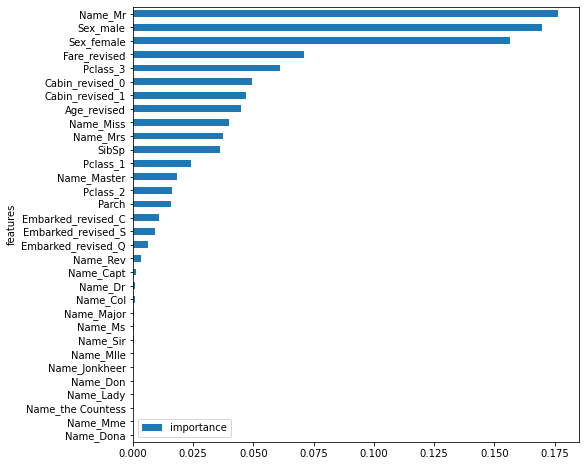

In [11]:
feature_set = pd.DataFrame()
feature_set = alldata_set
print(feature_set.head())

features = pd.DataFrame()
features['features'] = feature_set.columns
features['importance'] = rf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('features', inplace=True)

features.plot(kind='barh', figsize=(8, 8))

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [13]:
kfold = StratifiedKFold(n_splits=10)
#parameters = {
#    'n_estimators': [20, 50, 100, 200],
#    'criterion': ['gini','entropy'],
#    'max_depth': [2,3,5],
#    'min_samples_split': [2,3],
#    'min_samples_leaf': [1,3], 
#    'bootstrap': [True], 
#    'random_state':[1]
#    }
#model = RandomForestClassifier()
#GSCV = GridSearchCV(estimator=model,
#                  scoring='accuracy',
#                  n_jobs=4,
#                  param_grid=parameters,
#                  cv=kfold,
#                  verbose=1
#                  )
#GSCV.fit(X, y)
#print('Best Score: ',GSCV.best_score_)
#print('Best Parameter: ',GSCV.best_params_)
#RF = GSCV.best_estimator_

#Best Score:  0.8338951310861423
#Best Parameter:  {'bootstrap': True, 'criterion': 'gini',
#                  'max_depth': 5, 'min_samples_leaf': 1,
#                  'min_samples_split': 3, 'n_estimators': 100,
#                  'random_state': 1}
    
    
RF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=5, 
                            min_samples_leaf=1, min_samples_split=3, n_estimators=100,
                           random_state=1)

In [14]:
#rf = RandomForestClassifier(n_estimators=20, criterion='entropy', 
#                            max_depth=5, min_samples_split=3, 
#                            min_samples_leaf=1, 
#                            max_features='sqrt', 
#                            bootstrap=True, 
#                            random_state=1)
#
#rf = rf.fit(X,y)
#cv = cross_val_score(rf,X,y,cv=20)
#print(cv)
#print(cv.mean())

In [15]:
RF.fit(X, y)
prediction_y = RF.predict(X_test).astype(np.int32)
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction_y})
submission.to_csv('submissionF1.csv', index=False)